In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
import pickle
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
from pathlib import Path
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv("/content/drive/MyDrive/github/collegeproject/datasets/south_crop_class.csv")

In [3]:
df.columns

Index(['avg_year_temp', 'ph', 'rainfall', 'N', 'P', 'K', 'crop'], dtype='object')

In [4]:
x=df.iloc[:,0:-1].values 
y=df.iloc[:,-1].values
print("Inputs shape ",x.shape)
print("Outputs shape ",y.shape)


Inputs shape  (19354, 6)
Outputs shape  (19354,)


In [5]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import Normalizer

x_train,x_test,y_train,y_test=tts(x,y,random_state=2022,test_size=0.2)
normzr=Normalizer()
x_train=normzr.fit_transform(x_train)
x_test=normzr.transform(x_test)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15483, 6)
(3871, 6)
(15483,)
(3871,)


In [6]:

from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = tts(x, y,random_state=2022,test_size=0.2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
pickle.dump(scaler, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/scale.pkl", "wb"))

In [7]:
loaded_scale=pickle.load(open('/content/drive/MyDrive/github/collegeproject/pickle_files/southside/scale.pkl','rb'))

In [8]:
acc = []
model = []

Random forest Accuracy is:  99.50917075691036
              precision    recall  f1-score   support

       arhar       1.00      1.00      1.00       202
       bajra       1.00      1.00      1.00       184
  bengalgram       1.00      1.00      1.00       173
   coriander       1.00      1.00      1.00       174
  cottonlint       1.00      1.00      1.00       164
      cowpea       1.00      1.00      1.00        36
 drychillies       0.99      0.90      0.94       163
   greengram       1.00      1.00      1.00       222
   groundnut       1.00      1.00      1.00       254
       jowar       1.00      1.00      1.00       162
     linseed       1.00      1.00      1.00        49
 maizekharif       1.00      1.00      1.00       218
   maizerabi       1.00      1.00      1.00       173
     mustard       1.00      1.00      1.00        77
       onion       1.00      1.00      1.00       100
      potato       1.00      1.00      1.00        56
        ragi       0.92      0.99  

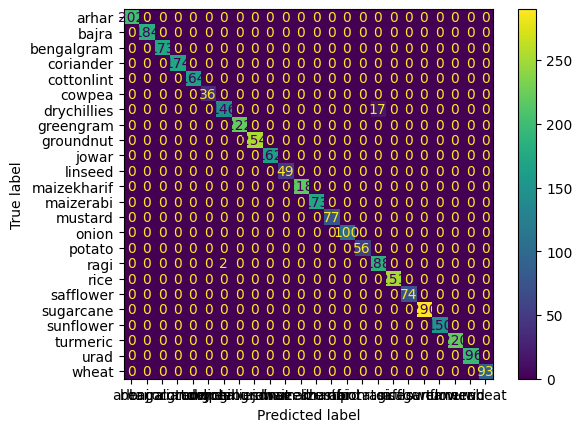

In [22]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,RocCurveDisplay,ConfusionMatrixDisplay

classifier = RandomForestClassifier(n_estimators=130,criterion='log_loss',random_state=2022)
classifier.fit(x_train,y_train)
y_pred_forest=classifier.predict(x_test)

predicted_values = y_pred_forest
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Random Forest')
print("Random forest Accuracy is: ", x*100)
matrix_plot=confusion_matrix(y_test, y_pred_forest, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
                             display_labels=classifier.classes_)
disp.plot()
print(classification_report(y_test, y_pred_forest))
#saving model
pickle.dump(classifier, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/forest_classifier.pkl", "wb"))

In [23]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2022,max_depth=5)

DecisionTree.fit(x_train,y_train)

predicted_values = DecisionTree.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))
#saving model
pickle.dump(DecisionTree, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/DecisionTree_classifier.pkl", "wb"))

DecisionTrees's Accuracy is:  93.87755102040816
              precision    recall  f1-score   support

       arhar       1.00      1.00      1.00       202
       bajra       0.99      1.00      1.00       184
  bengalgram       1.00      0.99      1.00       173
   coriander       1.00      1.00      1.00       174
  cottonlint       0.96      1.00      0.98       164
      cowpea       0.00      0.00      0.00        36
 drychillies       1.00      0.42      0.59       163
   greengram       1.00      1.00      1.00       222
   groundnut       1.00      1.00      1.00       254
       jowar       1.00      1.00      1.00       162
     linseed       0.00      0.00      0.00        49
 maizekharif       1.00      1.00      1.00       218
   maizerabi       0.76      1.00      0.86       173
     mustard       0.69      1.00      0.82        77
       onion       1.00      1.00      1.00       100
      potato       0.00      0.00      0.00        56
        ragi       0.67      1.00

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(x_train,y_train)

predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))
#saving model
pickle.dump(NaiveBayes, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/NaiveBayes_classifier.pkl", "wb"))

Naive Bayes's Accuracy is:  0.9917334022216482
              precision    recall  f1-score   support

       arhar       1.00      1.00      1.00       202
       bajra       1.00      1.00      1.00       184
  bengalgram       1.00      1.00      1.00       173
   coriander       1.00      1.00      1.00       174
  cottonlint       1.00      0.99      0.99       164
      cowpea       1.00      1.00      1.00        36
 drychillies       0.97      0.87      0.92       163
   greengram       1.00      1.00      1.00       222
   groundnut       1.00      1.00      1.00       254
       jowar       1.00      1.00      1.00       162
     linseed       0.98      0.94      0.96        49
 maizekharif       1.00      1.00      1.00       218
   maizerabi       1.00      1.00      1.00       173
     mustard       1.00      1.00      1.00        77
       onion       1.00      1.00      1.00       100
      potato       1.00      1.00      1.00        56
        ragi       0.89      0.98 

In [25]:
from sklearn.svm import SVC

SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(x_train,y_train)
predicted_values = SVM.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)

acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))
#saving the model
pickle.dump(SVM, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/SVM.pkl", "wb"))

SVM's Accuracy is:  0.975458537845518
              precision    recall  f1-score   support

       arhar       1.00      1.00      1.00       202
       bajra       1.00      1.00      1.00       184
  bengalgram       1.00      1.00      1.00       173
   coriander       1.00      1.00      1.00       174
  cottonlint       0.96      0.93      0.94       164
      cowpea       1.00      0.81      0.89        36
 drychillies       0.88      0.74      0.80       163
   greengram       0.99      1.00      0.99       222
   groundnut       1.00      1.00      1.00       254
       jowar       0.97      1.00      0.98       162
     linseed       1.00      0.65      0.79        49
 maizekharif       1.00      1.00      1.00       218
   maizerabi       1.00      1.00      1.00       173
     mustard       1.00      1.00      1.00        77
       onion       1.00      1.00      1.00       100
      potato       1.00      1.00      1.00        56
        ragi       0.82      0.91      0.86

In [26]:
!pip uninstall xgboost 

!pip install xgboost==0.90

import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(x_train,y_train)

predicted_values = XB.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))
#saving the model
pickle.dump(XB, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/XB.pkl", "wb"))

Found existing installation: xgboost 1.7.5
Uninstalling xgboost-1.7.5:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/xgboost-1.7.5.dist-info/*
    /usr/local/lib/python3.9/dist-packages/xgboost.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.9/dist-packages/xgboost/*
Proceed (Y/n)? y
  Successfully uninstalled xgboost-1.7.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 MB 8.8 MB/s eta 0:00:00
XGBoost's Accuracy is:  0.9935417204856626
              precision    recall  f1-score   support

       arhar       1.00      1.00      1.00       202
       bajra       1.00      1.00      1.00       184
  bengalgram       1.00      1.00      1.00       173
   coriander       1.00      1.00      1.00       174
  cottonlint       1.00      1.00      1.00       164
      cowpea       1.00      1.00      1.00        36
 drychillies       0.97      0.88      0.92      

In [27]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2022)

LogReg.fit(x_train,y_train)

predicted_values = LogReg.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

#saving the model
pickle.dump(LogReg, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/LogReg.pkl", "wb"))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression's Accuracy is:  0.9581503487470938
              precision    recall  f1-score   support

       arhar       1.00      1.00      1.00       202
       bajra       0.99      1.00      1.00       184
  bengalgram       1.00      1.00      1.00       173
   coriander       1.00      1.00      1.00       174
  cottonlint       0.96      0.95      0.95       164
      cowpea       1.00      0.81      0.89        36
 drychillies       0.68      0.42      0.52       163
   greengram       0.97      1.00      0.99       222
   groundnut       1.00      1.00      1.00       254
       jowar       0.97      1.00      0.98       162
     linseed       0.95      0.78      0.85        49
 maizekharif       1.00      1.00      1.00       218
   maizerabi       1.00      1.00      1.00       173
     mustard       1.00      1.00      1.00        77
       onion       1.00      1.00      1.00       100
      potato       1.00      1.00      1.00        56
        ragi       0.64   

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

predicted_values = knn.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('knn')
print("knn Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

#saving the model
pickle.dump(LogReg, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/knn.pkl", "wb"))

knn Accuracy is:  0.9873417721518988
              precision    recall  f1-score   support

       arhar       1.00      1.00      1.00       202
       bajra       1.00      1.00      1.00       184
  bengalgram       1.00      1.00      1.00       173
   coriander       1.00      1.00      1.00       174
  cottonlint       1.00      0.96      0.98       164
      cowpea       1.00      0.92      0.96        36
 drychillies       0.96      0.82      0.88       163
   greengram       0.99      1.00      0.99       222
   groundnut       1.00      1.00      1.00       254
       jowar       0.99      1.00      1.00       162
     linseed       1.00      0.92      0.96        49
 maizekharif       1.00      1.00      1.00       218
   maizerabi       1.00      1.00      1.00       173
     mustard       1.00      1.00      1.00        77
       onion       1.00      1.00      1.00       100
      potato       1.00      1.00      1.00        56
        ragi       0.86      0.97      0.92 

In [29]:
df.sample(n=30, random_state=2022)

,avg_year_temp,ph,rainfall,N,P,K,crop
13244,27.842835,9.573149,8.544850,0.000000,41.795438,0.000000,coriander
9974,22.297245,6.710052,34.677187,7.700928,25.122120,0.000000,mustard
15919,24.570230,6.906874,68.818068,18.571371,39.949754,19.486050,onion
784,16.103536,6.805529,92.114120,11.430211,28.051790,0.000000,cottonlint
17510,25.986366,8.806913,9.642416,0.000000,40.076778,0.000000,coriander
2448,29.722937,5.802764,99.185111,22.050863,11.193675,10.234538,ragi
8879,26.319972,6.604351,19.998913,10.624812,50.282668,13.055247,rice
6647,30.511137,7.179801,61.788979,7.649112,14.031448,10.754457,arhar
13681,24.931401,6.026592,38.719923,7.222019,22.040399,0.000000,mustard
6567,21.263365,7.078817,67.339581,10.974053,3.381371,0.000000,urad


In [30]:
#Loading and testing 

loaded_model=pickle.load(open('/content/drive/MyDrive/github/collegeproject/pickle_files/southside/forest_classifier.pkl','rb'))
loaded_scale=pickle.load(open('/content/drive/MyDrive/github/collegeproject/pickle_files/southside/scale.pkl','rb'))
data =loaded_scale.transform( np.array([[19.303938,	5.848167,	55.600334,	27.616547,	37.262996,	0.000000	]]))
prediction = loaded_model.predict(data)
print(prediction)

['bajra']


In [31]:
dff=pd.read_csv('/content/drive/MyDrive/github/collegeproject/datasets/south_crop_class.csv')

In [32]:
dff['crop'].unique()

array(['arhar', 'bajra', 'coriander', 'cottonlint', 'drychillies',
       'bengalgram', 'groundnut', 'jowar', 'maizekharif', 'maizerabi',
       'greengram', 'onion', 'potato', 'ragi', 'rice', 'sugarcane',
       'sunflower', 'turmeric', 'urad', 'wheat', 'linseed', 'safflower',
       'mustard', 'cowpea'], dtype=object)

In [33]:
x=dff.iloc[:,0:-1].values 
y=dff.iloc[:,-1].values
print("Inputs shape ",x.shape)
print("Outputs shape ",y.shape)

Inputs shape  (19354, 6)
Outputs shape  (19354,)


In [34]:
x=loaded_scale.transform(x)

Random forest Accuracy is:  99.9018290792601
              precision    recall  f1-score   support

       arhar       1.00      1.00      1.00      1064
       bajra       1.00      1.00      1.00       841
  bengalgram       1.00      1.00      1.00       895
   coriander       1.00      1.00      1.00       867
  cottonlint       1.00      1.00      1.00       974
      cowpea       1.00      1.00      1.00       181
 drychillies       1.00      0.97      0.99       650
   greengram       1.00      1.00      1.00      1077
   groundnut       1.00      1.00      1.00      1192
       jowar       1.00      1.00      1.00       756
     linseed       1.00      1.00      1.00       298
 maizekharif       1.00      1.00      1.00      1093
   maizerabi       1.00      1.00      1.00       862
     mustard       1.00      1.00      1.00       346
       onion       1.00      1.00      1.00       500
      potato       1.00      1.00      1.00       272
        ragi       0.98      1.00   

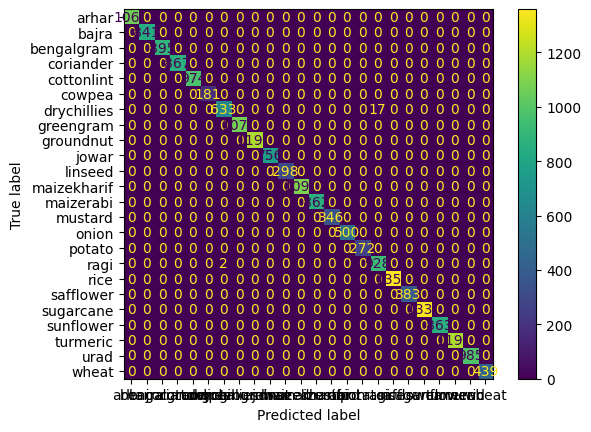

In [35]:
y_pred_forest=loaded_model.predict(x)

predicted_values = y_pred_forest
per = metrics.accuracy_score(y, predicted_values)

print("Random forest Accuracy is: ", per*100)
matrix_plot=confusion_matrix(y, y_pred_forest, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
                             display_labels=classifier.classes_)
disp.plot()
print(classification_report(y, y_pred_forest))

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

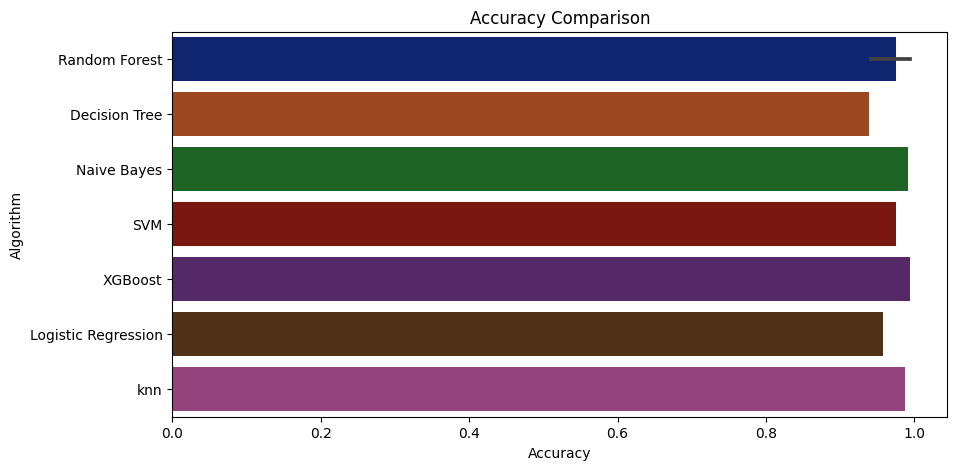

In [36]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/github/collegeproject/datasets/uniform_distribution_south_crops.csv")
c = df.crop.astype('category')
targets = dict(enumerate(c.cat.categories))
df['crop'] = c.cat.codes

# Split the data into training and testing sets
x = df.drop('crop', axis=1).values
y = df['crop'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2022, test_size=0.2)

# Standardize the training and testing data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Convert y_train and y_test to categorical format
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Define the neural network model
input_size = x_train.shape[1]
output_size = num_classes
ann_model = Sequential()
ann_model.add(Dense(units=64, activation='sigmoid', input_shape=(input_size,)))
ann_model.add(Dense(units=output_size, activation='softmax'))

# Compile the model
ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# Train the model
model_results = ann_model.fit(x_train, y_train, epochs=200, batch_size=50, validation_split=0.2)

# Make predictions on the test data and convert them to categorical format
y_pred_ann = ann_model.predict(x_test)
y_pred_ann = np.argmax(y_pred_ann, axis=1)
y_test = np.argmax(y_test, axis=1)

# Generate the confusion matrix and classification report
matrix_plot = confusion_matrix(y_test, y_pred_ann)
print('Confusion Matrix:\n', matrix_plot)
print('Classification Report:\n', classification_report(y_test, y_pred_ann))

x_ = metrics.accuracy_score(y_test, y_pred_ann)
acc.append(x_)
model.append('ann')

pickle.dump(ann_model, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/ann_w_report.pkl", "wb"))

Epoch 1/200
56/56 [==============================] - 2s 12ms/step - loss: 3.1761 - categorical_accuracy: 0.0554 - val_loss: 3.0538 - val_categorical_accuracy: 0.1266
Epoch 2/200
56/56 [==============================] - 0s 8ms/step - loss: 2.9657 - categorical_accuracy: 0.2446 - val_loss: 2.8938 - val_categorical_accuracy: 0.4129
Epoch 3/200
56/56 [==============================] - 0s 5ms/step - loss: 2.7998 - categorical_accuracy: 0.4691 - val_loss: 2.7267 - val_categorical_accuracy: 0.4647
Epoch 4/200
56/56 [==============================] - 0s 8ms/step - loss: 2.6180 - categorical_accuracy: 0.5140 - val_loss: 2.5518 - val_categorical_accuracy: 0.4978
Epoch 5/200
56/56 [==============================] - 0s 8ms/step - loss: 2.4233 - categorical_accuracy: 0.5629 - val_loss: 2.3606 - val_categorical_accuracy: 0.4921
Epoch 6/200
56/56 [==============================] - 0s 5ms/step - loss: 2.2282 - categorical_accuracy: 0.5511 - val_loss: 2.1721 - val_categorical_accuracy: 0.5871
Epoch 7/2

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

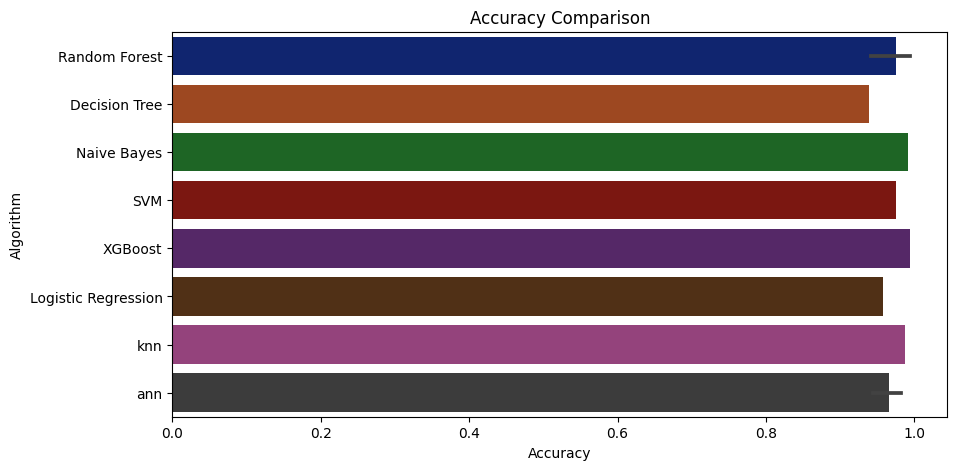

In [44]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')